In [15]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
import skfuzzy
import matplotlib.pyplot as plt

In [6]:
iris =datasets.load_iris()

In [8]:
r = skfuzzy.cmeans(data=iris.data.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

In [9]:
previsoes_porcentagem = r[1]

In [10]:
for x in range(150):
    print(previsoes_porcentagem[0][x], previsoes_porcentagem[1][x], previsoes_porcentagem[2][x])

0.9966228078559305 0.0023047539942573697 0.0010724381498120794
0.9758551077220433 0.0166465308205872 0.00749836145736935
0.9798268862327448 0.01375785211602591 0.00641526165122919
0.9674307976312001 0.022461039354328128 0.010108163014471691
0.9944693491594806 0.003762137808830961 0.0017685130316884307
0.9345764616102642 0.04480172264129148 0.020621815748444374
0.9794926778741263 0.01400210567642788 0.006505216449445823
0.9995473187366555 0.000311471996658092 0.00014120926668631506
0.930385402414843 0.047710337782292264 0.021904259802864527
0.9827250723241139 0.01193315570412088 0.0053417719717651505
0.9680424997604317 0.02175522284377533 0.010202277395792811
0.99213832659596 0.005430582220991507 0.0024310911830483914
0.9706427713721413 0.02017941128830029 0.009177817339558452
0.9229734404671947 0.05178800657205196 0.025238552960753384
0.889758616629942 0.07260560361444886 0.037635779755609305
0.8413454930212602 0.10434306430561152 0.05431144267312829
0.9469249318332987 0.03557714354914

In [11]:
previsoes = previsoes_porcentagem.argmax(axis = 0)
resultado = confusion_matrix(iris.target, previsoes)
resultado

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0, 13, 37]], dtype=int64)

In [14]:
taxa_acerto = accuracy_score(iris.target, previsoes)
taxa_erro = 1 - taxa_acerto
print(f'Acerto:{taxa_acerto} || Erro:{taxa_erro}')

Acerto:0.8933333333333333 || Erro:0.10666666666666669


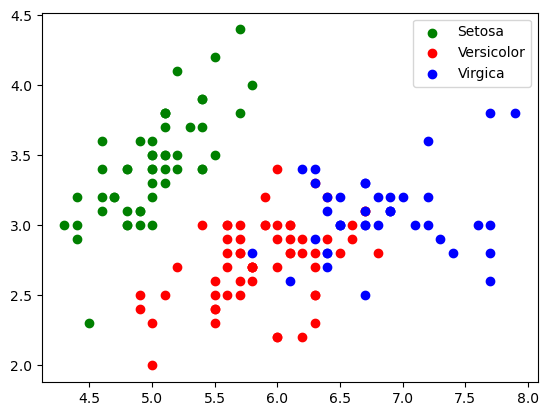

In [16]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()